                                                                           
## Mini-projet: Déploiement d'un modèle de Machine Learning
ANAS ROUI & GUAROUAL OUMAIMA

Département MIS

$École Mohammadia d’Ingénieurs$ 



In [3]:
# Importer les librairies python nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # pour enregistrer et téléchargé le modèle / scaler 
import os

In [4]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [5]:
# Identifier mon répertoire de travail actuel
os.getcwd()

'C:\\Users\\Acer\\Downloads'

In [7]:
#lire la base de données
df=pd.read_csv("C:/Users/Acer/OneDrive/uber.csv")
print(f" data.shape:{df.shape}")

 data.shape:(200000, 9)


Le jeu de données contient les champs suivants :

* key : un identifiant unique pour chaque trajet.

* fare_amount : le coût de chaque trajet en dollars américains (USD).

* pickup_datetime : la date et l'heure à laquelle le compteur a été activé.

* passenger_count : le nombre de passagers dans le véhicule (valeur saisie par le conducteur).

* pickup_longitude : la longitude à laquelle le compteur a été activé.

* pickup_latitude : la latitude à laquelle le compteur a été activé.

* dropoff_longitude : la longitude à laquelle le compteur a été désactivé.

* dropoff_latitude : la latitude à laquelle le compteur a été désactivé.


In [79]:
# Afficher l’en-tête des données
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [80]:
# Afficher la liste des  variables
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [81]:
# Afficher le type de  chaque variable
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
#'Unnamed: 0' (un doublon de l'index) et 'key' (un identifiant unique déjà géré par l'index), allégeant ainsi le jeu de données pour l'analyse.
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)


In [83]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [84]:
df.shape


(200000, 7)

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


### Analyser la base de données


### 1 les données manquantes

In [86]:
# Vérifier s'il y a des données manquantes
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

<Axes: >

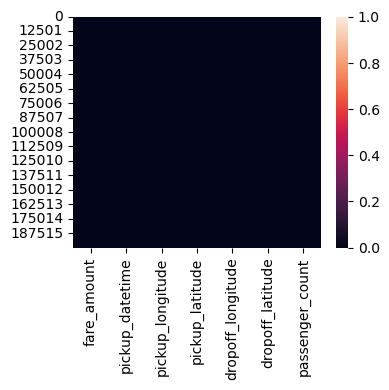

In [9]:
# Vérifier s'il y a des données manquantes:visualisation graphique
plt.figure(figsize=(4,3))
sns.heatmap(df.isna())

### 2 les données aberrantes 



In [10]:
M = df.copy()
#affichage du nombre d'occurrences de chaque valeur unique dans la colonne passenger_count
df.passenger_count.value_counts()


passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [11]:
df[df.passenger_count == 208]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [12]:
# supprimant les lignes où le nombre de passagers est soit égal à 0 (ce qui est probablement invalide), soit égal à 208 (une valeur aberrante)
df = df[~(df.passenger_count == 0) & ~(df.passenger_count == 208)]
df.shape

(199290, 7)

In [91]:
df.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
#supprimer les valeurs aberrantes de latitude et de longitude
df = df[
    (df.pickup_latitude < 90) & (df.dropoff_latitude > -90) &
    (df.pickup_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180)&
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180)
]
df.shape


(199278, 7)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_datetime    199278 non-null  object 
 2   pickup_longitude   199278 non-null  float64
 3   pickup_latitude    199278 non-null  float64
 4   dropoff_longitude  199278 non-null  float64
 5   dropoff_latitude   199278 non-null  float64
 6   passenger_count    199278 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [14]:
#convertir la colonne 'pickup_datetime' en un format datetime pour faciliter la manipulation, puis extrait et ajout de nouvelles colonnes 'year' (année), 'month' (mois), 'day' (jour), et 'hour' (heure) correspondant à la date et l'heure de prise en charge
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [95]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [15]:
df.drop(['pickup_datetime'],axis=1, inplace=True)


In [97]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_longitude   199278 non-null  float64
 2   pickup_latitude    199278 non-null  float64
 3   dropoff_longitude  199278 non-null  float64
 4   dropoff_latitude   199278 non-null  float64
 5   passenger_count    199278 non-null  int64  
 6   year               199278 non-null  int32  
 7   month              199278 non-null  int32  
 8   day                199278 non-null  int32  
 9   hour               199278 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 13.7 MB


In [99]:
#le nombre total de valeurs manquantes (NaN) pour chaque colonne du DataFrame df
df.isna().sum()


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64

In [16]:
# le nombre total de lignes dupliquées dans le DataFrame df
df.duplicated().sum()


3

In [17]:
T=df.copy()

In [18]:
#visualiser les lignes dupliquées
duplicates = T[T.duplicated(keep=False)]
duplicates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
64178,5.0,0.0,0.0,0.0,0.0,1,2014,7,13,16
87962,12.5,0.0,0.0,0.0,0.0,1,2011,10,5,10
92070,5.0,0.0,0.0,0.0,0.0,1,2014,7,13,16
116790,8.9,0.0,0.0,0.0,0.0,1,2012,1,27,9
149819,12.5,0.0,0.0,0.0,0.0,1,2011,10,5,10
184856,8.9,0.0,0.0,0.0,0.0,1,2012,1,27,9


In [19]:
df.drop_duplicates(inplace=True)


In [104]:
df.duplicated().sum()


0

In [105]:
#df['monthly_quarter'] = df.month.map({1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q2', 5: 'Q2', 6: 'Q2', 7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'})
#df['hourly_segment'] = df.hour.map({0: 'H1', 1: 'H1', 2: 'H1', 3: 'H1', 4: 'H2', 5: 'H2', 6: 'H2', 7: 'H2', 8: 'H3', 9: 'H3', 10: 'H3', 11: 'H3', 12: 'H4', 13: 'H4', 14: 'H4', 15: 'H4', 16: 'H5', 17: 'H5', 18: 'H5', 19: 'H5', 20: 'H6', 21: 'H6', 22: 'H6', 23: 'H6'})
#df

In [20]:
## Afficher un résumé des données

df.describe(include="all")


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
count,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000,199275.000000
mean,11.366710,-72.505053,39.919661,-72.514546,39.923564,1.689504,2011.743836,6.283116,15.705327,13.492756
std,9.910759,10.439229,6.126165,10.402558,6.114020,1.305426,1.859202,3.438454,8.686810,6.516256
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,1.000000,0.000000
25%,6.000000,-73.992063,40.734797,-73.991409,40.733829,1.000000,2010.000000,3.000000,8.000000,9.000000
50%,8.500000,-73.981825,40.752585,-73.980095,40.753042,1.000000,2012.000000,6.000000,16.000000,14.000000
75%,12.500000,-73.967161,40.767155,-73.963663,40.767995,2.000000,2013.000000,9.000000,23.000000,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,31.000000,23.000000


### Calculer la distance de la course

In [21]:
from geopy.distance import geodesic #pickup-dropoff will give distance
df['distance'] = [round(geodesic((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).km, 2) for i in df.index]

In [22]:

bd = df.copy()
#supprimer les donnees remplaces par la distance 
bd.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',], axis=1, inplace=True)


In [23]:
bd

,fare_amount,passenger_count,year,month,day,hour,distance
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.45
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48
...,...,...,...,...,...,...,...
199995,3.0,1,2012,10,28,10,0.11
199996,7.5,1,2014,3,14,1,1.88
199997,30.9,2,2009,6,29,0,12.87
199998,14.5,1,2015,5,20,14,3.54


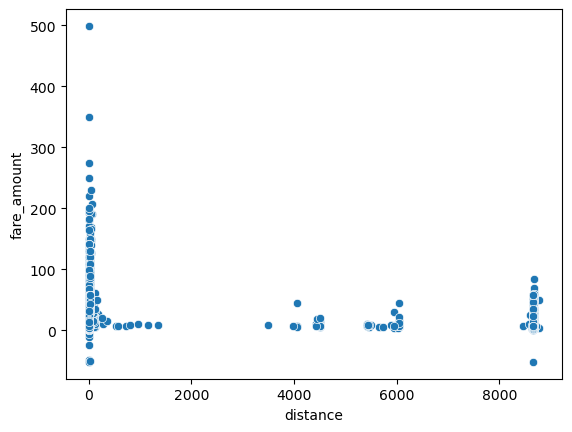

In [111]:
#visualiser la relation entre la distance parcourue et le montant de la course.
sns.scatterplot(data=bd, x='distance', y='fare_amount')
plt.show()

In [24]:
#éliminer les valeurs aberrantes
bd = bd[(bd.fare_amount < 250) & (bd.fare_amount > 0)]
bd = bd[bd.distance < 250]

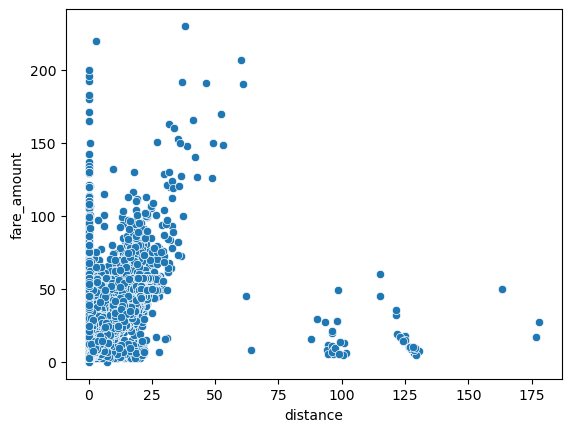

In [113]:
sns.scatterplot(data=bd, x='distance', y='fare_amount')
plt.show()


In [25]:
# outlier
df1 = bd.copy()
features1 = ['fare_amount', 'distance']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
display(df1.head())

,fare_amount,passenger_count,year,month,day,hour,distance
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.45
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      173737 non-null  float64
 1   passenger_count  173737 non-null  int64  
 2   year             173737 non-null  int32  
 3   month            173737 non-null  int32  
 4   day              173737 non-null  int32  
 5   hour             173737 non-null  int32  
 6   distance         173737 non-null  float64
dtypes: float64(2), int32(4), int64(1)
memory usage: 6.6 MB


In [26]:
df = df1.copy()


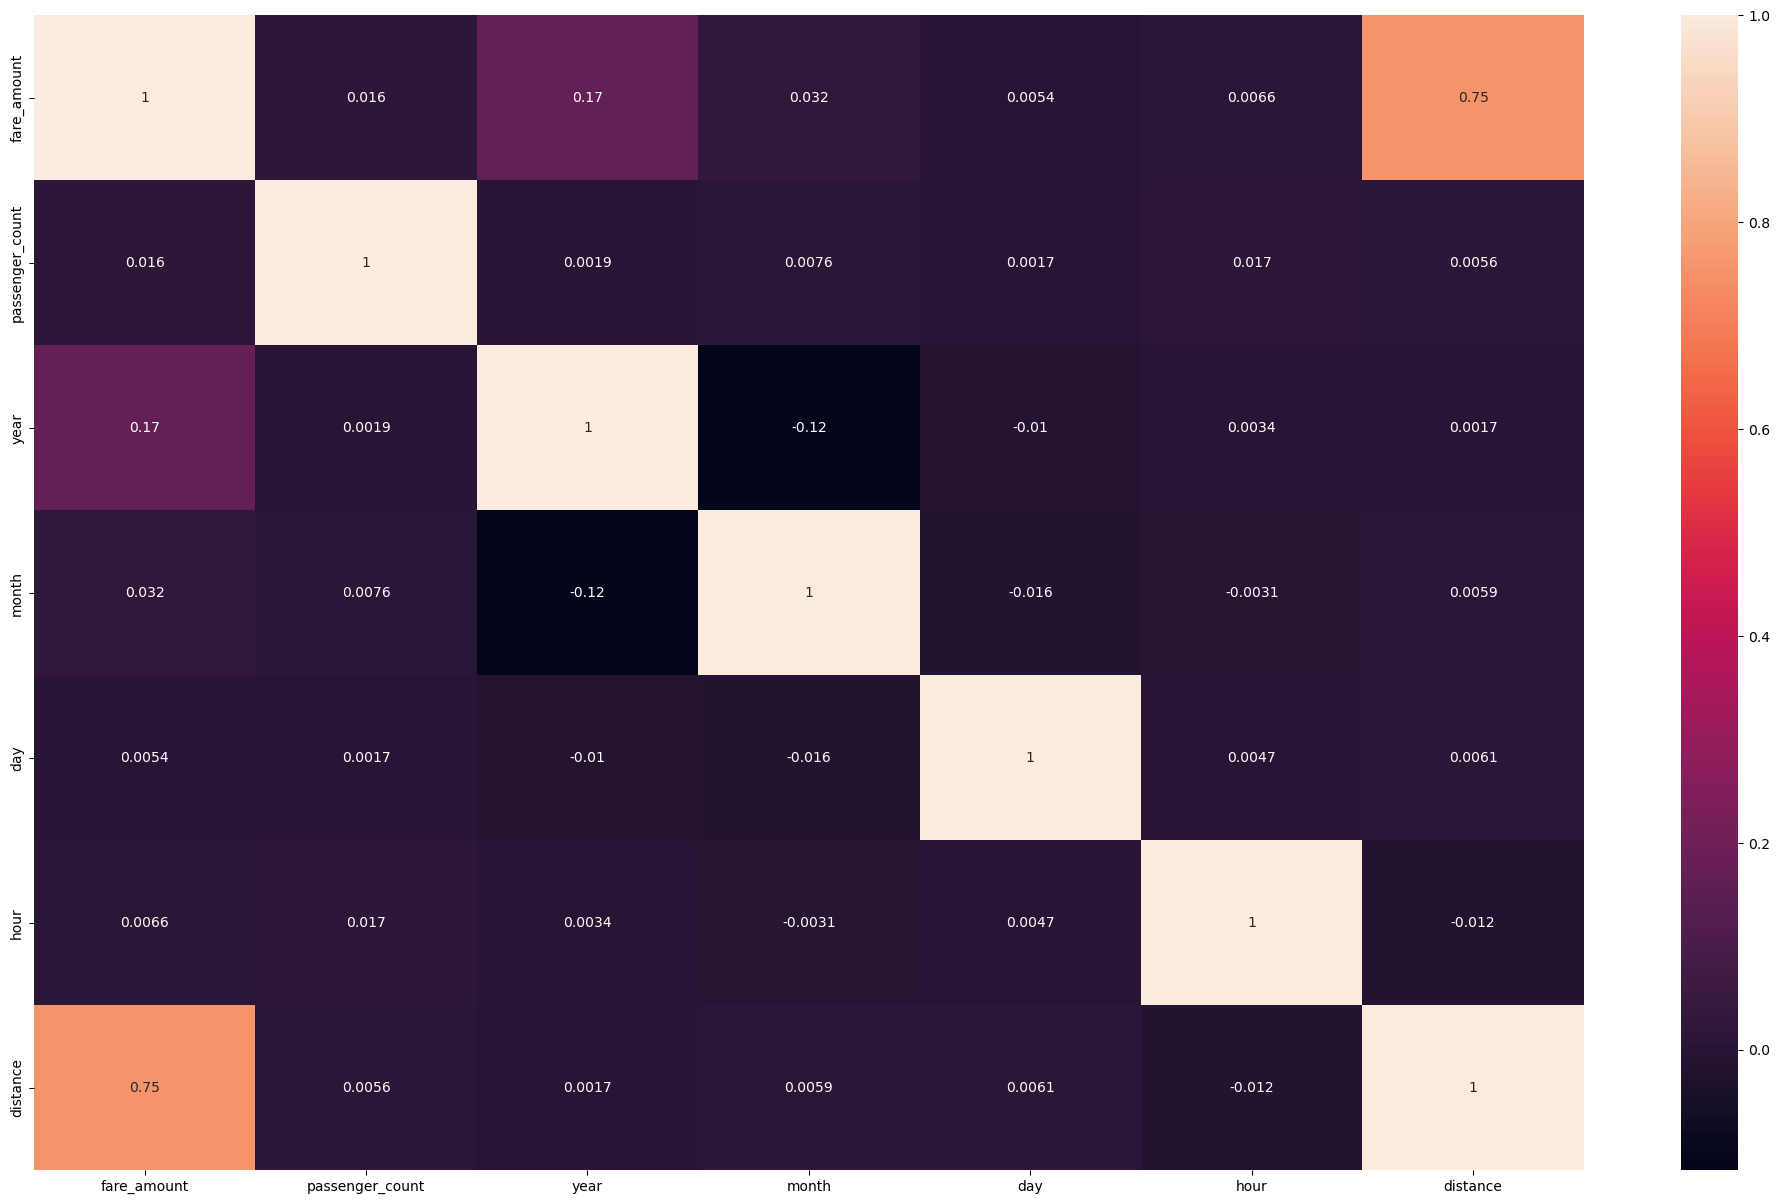

In [27]:
import seaborn as sns
sns.set_style()
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

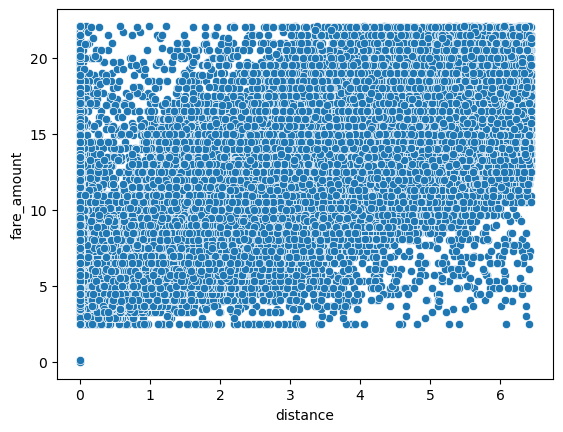

In [117]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.show()

In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      173737 non-null  float64
 1   passenger_count  173737 non-null  int64  
 2   year             173737 non-null  int32  
 3   month            173737 non-null  int32  
 4   day              173737 non-null  int32  
 5   hour             173737 non-null  int32  
 6   distance         173737 non-null  float64
dtypes: float64(2), int32(4), int64(1)
memory usage: 6.6 MB


In [119]:
#df_dummy = pd.get_dummies(df[['monthly_quarter', 'hourly_segment']], drop_first= True)
#df_dummy

In [120]:
#df = pd.concat([df, df_dummy], axis=1)
#df

In [121]:
#df.drop(['monthly_quarter', 'hourly_segment'], axis=1, inplace=True)


In [122]:
#df.info()


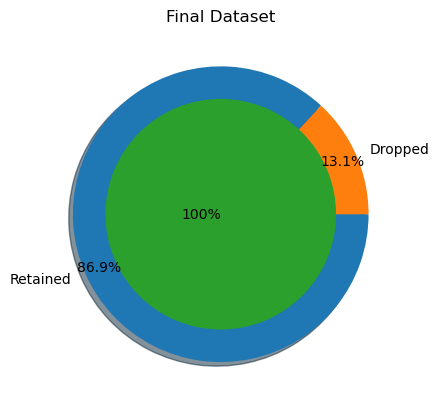


Inference: After the cleanup process, 26263 samples were dropped, while retaining 13.13% of the data.


In [28]:
df2 = df.copy()
plt.title('Final Dataset')
plt.pie([df2.shape[0], M.shape[0]-df2.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df2.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {M.shape[0]-df2.shape[0]} samples were dropped, \
while retaining {round(100 - (df2.shape[0]*100/(M.shape[0])),2)}% of the data.')

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



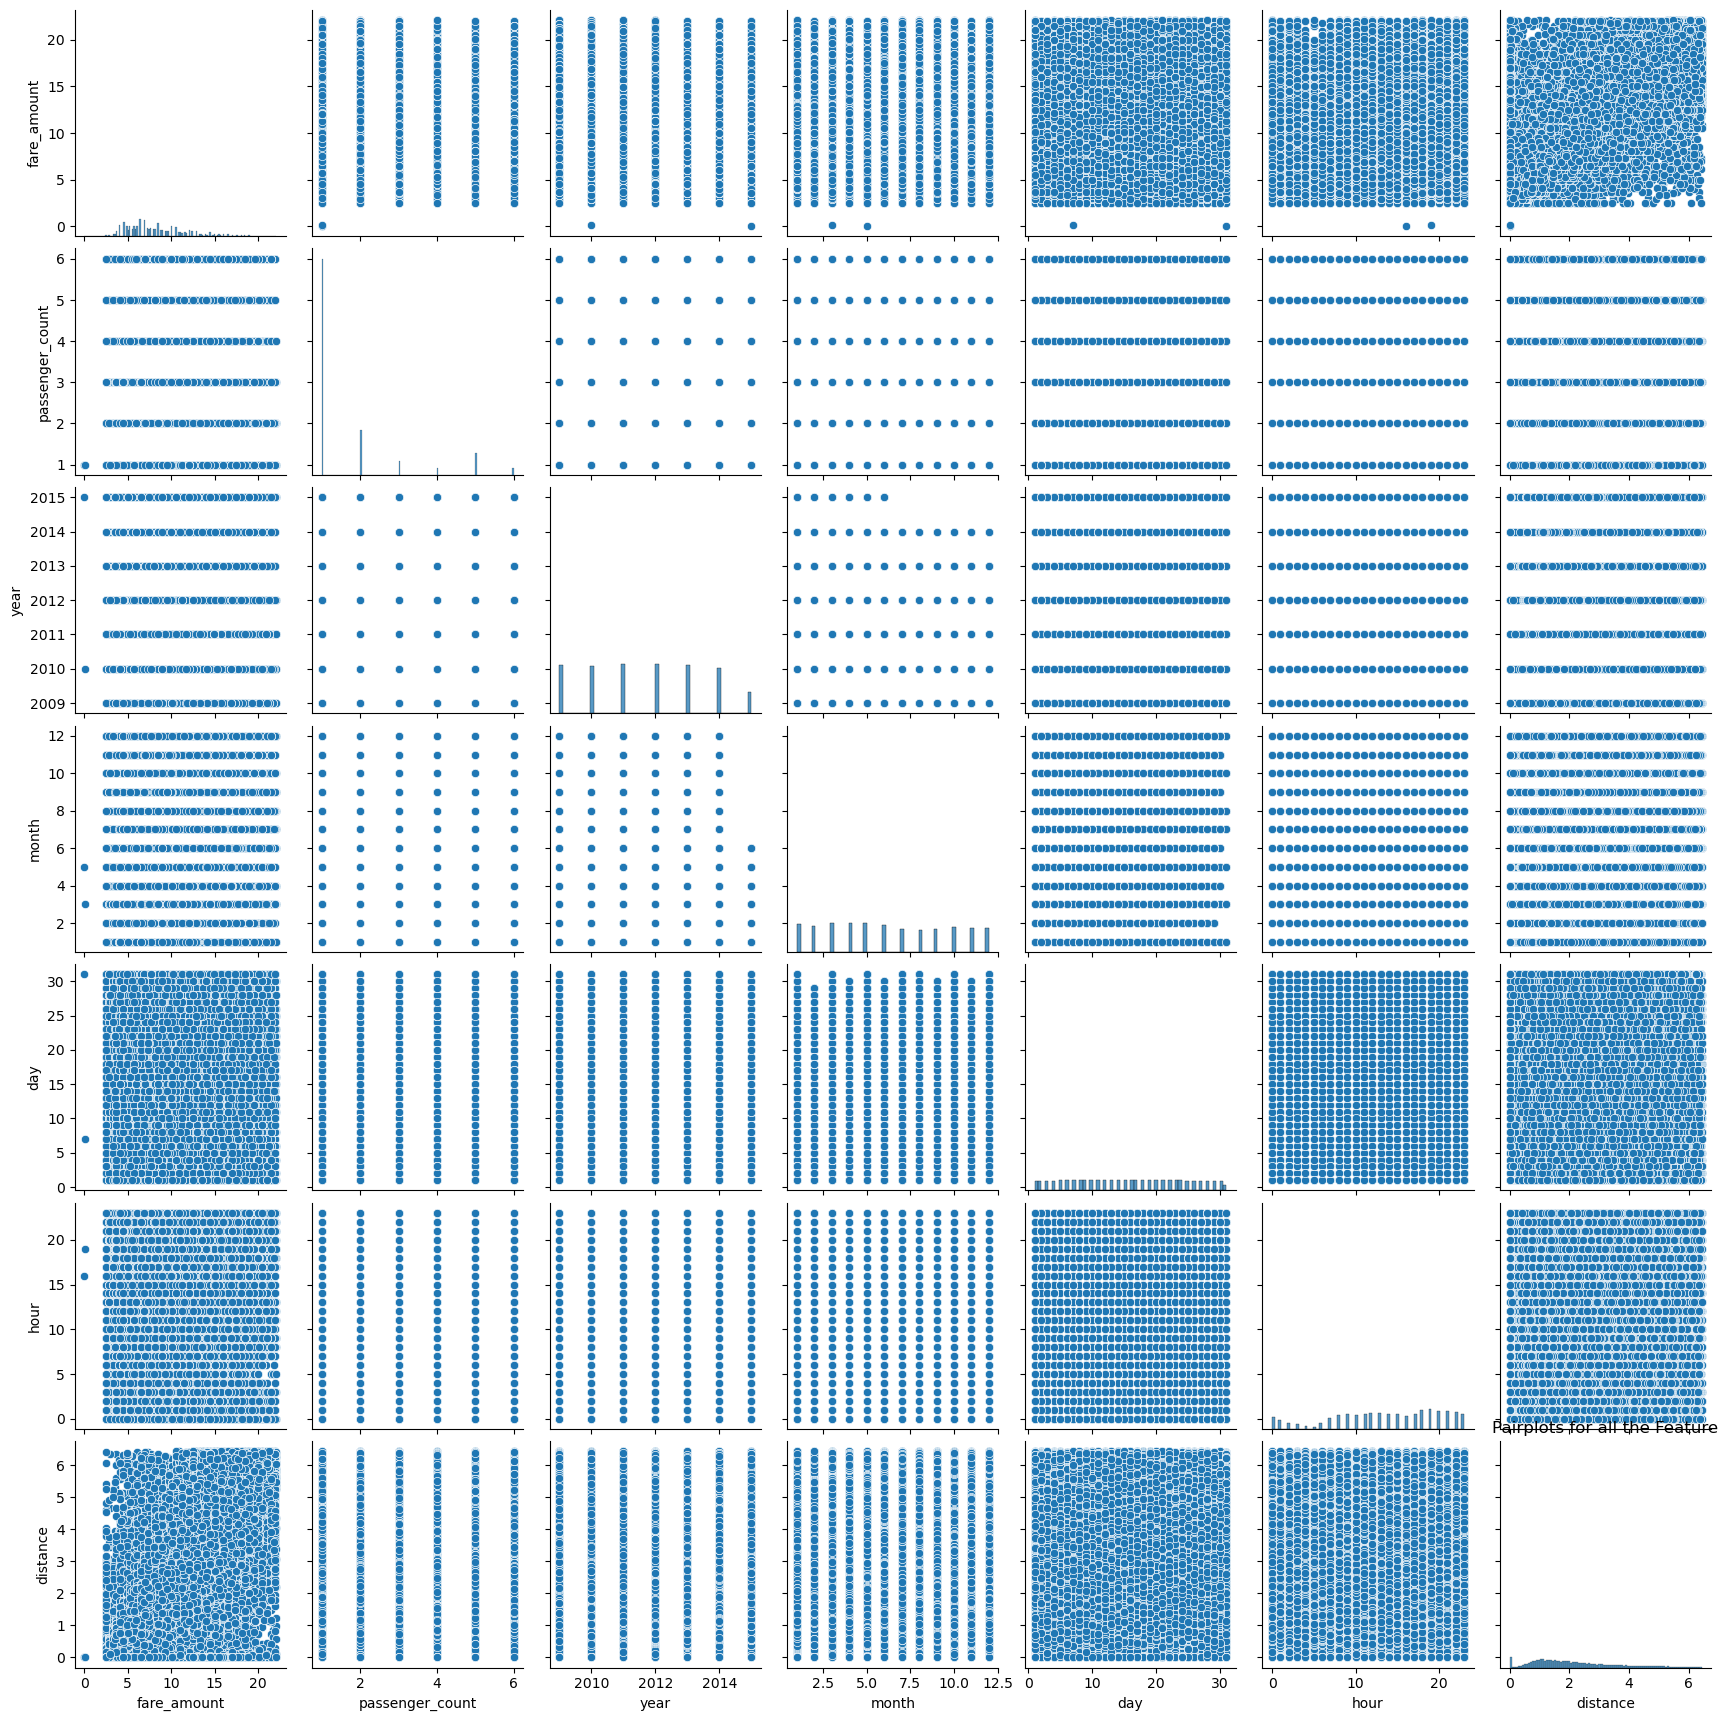

In [42]:
#Showing the multicolinearity

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
plt.show()

### préparation des données pour l'entraînement du modèle de prédiction

In [124]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [125]:
X


,passenger_count,year,month,day,hour,distance
0,1,2015,5,7,19,1.68
1,1,2009,7,17,20,2.45
2,1,2009,8,24,21,5.04
3,3,2009,6,26,8,1.66
4,5,2014,8,28,17,4.48
...,...,...,...,...,...,...
173732,1,2014,1,31,14,1.12
173733,1,2012,10,28,10,0.11
173734,1,2014,3,14,1,1.88
173735,1,2015,5,20,14,3.54


In [126]:
y


0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
173732    12.0
173733     3.0
173734     7.5
173735    14.5
173736    14.1
Name: fare_amount, Length: 173737, dtype: float64

In [127]:
from sklearn.preprocessing import StandardScaler
X.tail() #assurer que vos données sont prêtes avant de les traiter davantage

,passenger_count,year,month,day,hour,distance
173732,1,2014,1,31,14,1.12
173733,1,2012,10,28,10,0.11
173734,1,2014,3,14,1,1.88
173735,1,2015,5,20,14,3.54
173736,1,2010,5,15,4,5.41


In [128]:
#standardiser les variables explicatives non binaires
#binary_data = X[["monthly_quarter_Q2", "monthly_quarter_Q3", "monthly_quarter_Q4", "hourly_segment_H2", "hourly_segment_H3", "hourly_segment_H4", "hourly_segment_H5", "hourly_segment_H6"]]
#non_binary_data=X.drop(["monthly_quarter_Q2","monthly_quarter_Q3","monthly_quarter_Q4","hourly_segment_H2","hourly_segment_H3","hourly_segment_H4","hourly_segment_H5","hourly_segment_H6"],axis=1)
scaler=StandardScaler()
Xs=scaler.fit_transform(X)
# enregistrer le  scaler 
joblib.dump(scaler, 'scaler.pkl') 

#transformer les données standardisées en dataframe
Xs=pd.DataFrame(Xs,columns=X.columns,index=X.index)
#Xs_final=pd.concat([Xs,binary_data],axis=1) # ajouter les variables binaires à notre base de données standardisée
#Xs_final.tail()

In [129]:
x_train,x_test,y_train,y_test=train_test_split(Xs,y,test_size=0.3,random_state=42)

In [130]:
x_train

,passenger_count,year,month,day,hour,distance
54955,-0.526761,1.226547,0.213007,-0.311142,-1.647426,0.313686
115405,0.239611,0.150470,0.213007,0.149463,0.218340,-1.052379
104925,2.538726,-0.387569,0.503275,-1.117201,-0.403582,-0.735011
104020,-0.526761,0.150470,0.793543,1.185825,1.462183,0.796639
163716,0.239611,0.150470,-0.657798,0.840371,1.306703,-0.093374
...,...,...,...,...,...,...
119879,-0.526761,1.226547,-0.367530,0.955523,1.462183,-0.879896
103694,-0.526761,0.688509,-0.367530,-0.541445,-0.248102,2.907832
131932,-0.526761,0.688509,1.083812,-0.426293,0.218340,-0.217561
146867,-0.526761,-0.387569,1.374080,0.034312,-0.403582,-0.417642


In [131]:
print(x_train.shape)
print(x_test.shape)

(121615, 6)
(52122, 6)


In [132]:
data12 = X.copy()

### Entrainer un modèle de régression linéaire

In [133]:
# Préciser le modèle
model=LinearRegression()
#entrainer le modèle
model.fit(x_train,y_train)

LinearRegression()

In [134]:
# Afficher les coefs du modèle
print(x_train.columns)
print(f"les coefficients du modèle:{model.coef_}")
print(f"la constante:{model.intercept_}")

Index(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'], dtype='object')
les coefficients du modèle:[0.03700568 0.65399591 0.1723112  0.00973235 0.05103825 2.8059522 ]
la constante:8.547848649376407


In [135]:
# tester la performance du  modèle
pred1=model.predict(x_test)
MSE=mean_squared_error(y_test,pred1)
R2_score=r2_score(y_test,pred1)
print(f'MSE:{MSE.round(2)}')
print(f'R2:{R2_score}')

MSE:5.6
R2:0.5978874091724936


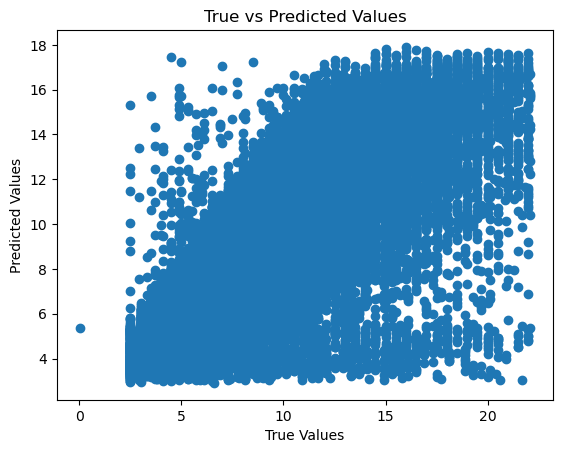

In [136]:
#Visualizing Predictions
plt.scatter(y_test, pred1)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression Ridge

In [137]:
# soit lambda =0.6, ici le choix n'est pas optimal
model1=Ridge(alpha=2.14)
model1.fit(x_train,y_train)

Ridge(alpha=2.14)

In [138]:
# afficher les coefs
print(x_train.columns)
print(model1.coef_)

Index(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'], dtype='object')
[0.03700541 0.65398406 0.172307   0.00973216 0.05103674 2.80590276]


In [139]:
# afficher la val de la cst 
print(model1.intercept_)

8.547848492974259


In [140]:
# tester la performance du modèle
pred2=model1.predict(x_test)
MSE=mean_squared_error(pred2,y_test)
R2_score=r2_score(pred2,y_test)
print(MSE.round(2))
print(R2_score)

5.6
0.32892541961626054


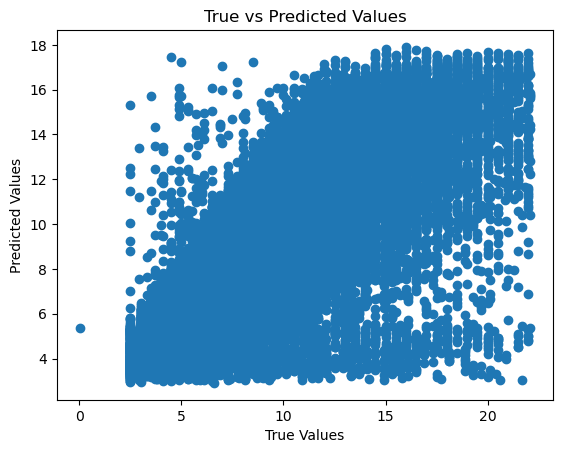

In [141]:
#Visualizing Predictions
plt.scatter(y_test, pred2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression Lasso

In [142]:
## soit lambda =0.1, ici le choix n'est pas optimal
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)

Lasso(alpha=0.001)

In [143]:
## soit lambda =0.1, ici le choix n'est pas optimal
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)
# tester la performance du modèle
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

5.6
0.3283260466807709


In [144]:
# afficher les coefs
print(x_train.columns)
print(model2.coef_)

Index(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'], dtype='object')
[0.03604754 0.65285614 0.17116802 0.00871116 0.05004722 2.80495597]


In [145]:
# Afficher la val de la cst 
print(model2.intercept_)

8.547840588930454


In [146]:
# tester la performance du modèle
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

5.6
0.3283260466807709


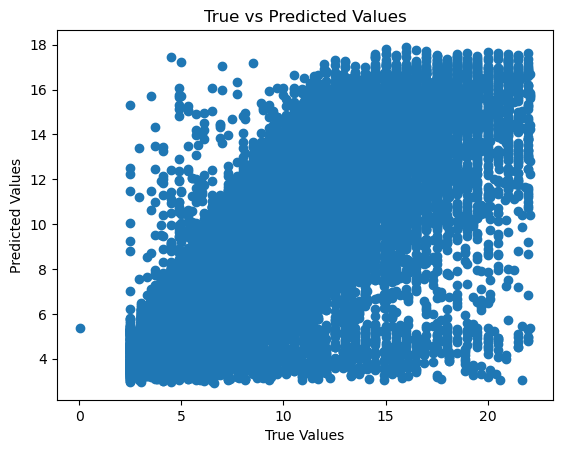

In [147]:
#Visualizing Predictions
plt.scatter(y_test, pred3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Entrainer un modèle de régression ElasticNet

$$ Min_{\beta} \frac{1}{2n}||y-X\beta ||^2_2 +\alpha [\rho||\beta||_1+\frac{(1-\rho)}{2} ||\beta||^2_2]$$

In [148]:
# soient lambda=0.6 et 0.01, le choix n'est pas optimal
model3=ElasticNet(alpha=0.04,l1_ratio=0.001)

In [149]:
model3.fit(x_train,y_train)

ElasticNet(alpha=0.04, l1_ratio=0.001)

In [150]:
print(model3.coef_)
print(model3.intercept_)

[0.03634353 0.62810678 0.16320148 0.00928642 0.0477517  2.69794971]
8.547507204464118


In [151]:
# tester la performance du modèle
pred=model3.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
MSE.round(2)
R2_score

0.27247832748696

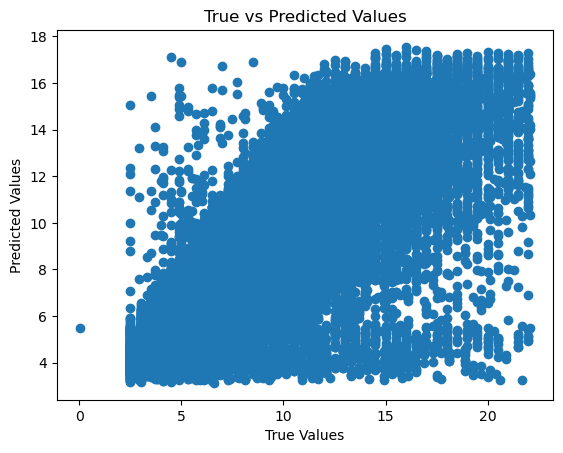

In [152]:
#Visualizing Predictions
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

### Choisir les valeurs optimales des hyper-paramètres par CV

#### Régression Ridge 

In [153]:
# Préciser les valeurs de lambda à tester 
nb_va=300
# donne des valeurs entre 10^(-3) et 10^(2)
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

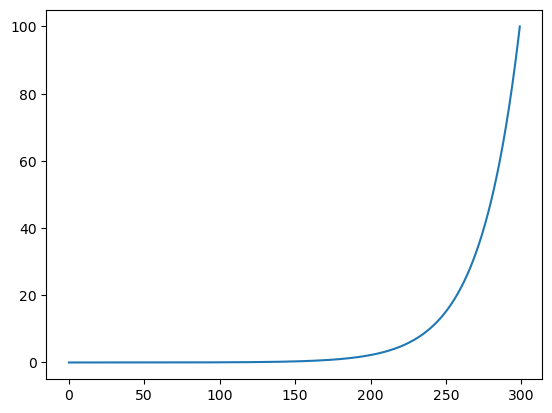

In [154]:
plt.plot(np.arange(300),lambda_values)

In [155]:
# modèle Ridge
model=Ridge()

In [156]:
grid=GridSearchCV(model,lambda_range,scoring="neg_mean_squared_error",
                  cv=5)
#'neg_mean_squared_error' à maximiser (à minimiser mse)

In [157]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [158]:
# afficher la valeur optimal de lambda
grid.best_params_

{'alpha': 4.961947603002903}

In [159]:
# Entrainer le modèle Ridge avec la valeur optimale de lambda séléctionnée
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(R2_score)
print(MSE)

0.3288942006491614
5.604087387578813


#### Régression Lasso:

In [160]:
# préciser les valeurs de lambda à tester 
nb_va=30
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [161]:
# modèle Lasso
model=Lasso()
grid=GridSearchCV(model,lambda_range,scoring='neg_mean_squared_error',cv=2)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [162]:
# afficher la valeur optimal de lambda
grid.best_params_

{'alpha': 0.001}

In [163]:
# Entrainer le modèle Ridge avec la valeur optimale de lambda séléctionnée
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
MSE
R2_score

0.3283260466807709

#### Régression ElasticNet

In [164]:
nb_val=30 # nbr de valeurs à tester 
lambda_range=np.logspace(-3,2,nb_val) # valeurs de lambda à tester
rho_range=[0.1,0.01,0.001]    # valeurs de rho à tester  
hpers={"alpha":lambda_range,"l1_ratio":rho_range} 

In [165]:
model=ElasticNet()
grid=GridSearchCV(model,hpers,cv=5,scoring="neg_mean_squared_error")

In [166]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                         'l1_ratio': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [167]:
# Afficher les valeurs optimales des hyperparamètres
grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [168]:
#Entrainer le modèle ElasticNet avec les valeurs optimales séléctionnées
# de lambda et de alpha 
model=grid.best_estimator_
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(MSE)
R2_score

5.604094468286589


0.3276745874658116

In [169]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [170]:
x_train

,passenger_count,year,month,day,hour,distance
54955,-0.526761,1.226547,0.213007,-0.311142,-1.647426,0.313686
115405,0.239611,0.150470,0.213007,0.149463,0.218340,-1.052379
104925,2.538726,-0.387569,0.503275,-1.117201,-0.403582,-0.735011
104020,-0.526761,0.150470,0.793543,1.185825,1.462183,0.796639
163716,0.239611,0.150470,-0.657798,0.840371,1.306703,-0.093374
...,...,...,...,...,...,...
119879,-0.526761,1.226547,-0.367530,0.955523,1.462183,-0.879896
103694,-0.526761,0.688509,-0.367530,-0.541445,-0.248102,2.907832
131932,-0.526761,0.688509,1.083812,-0.426293,0.218340,-0.217561
146867,-0.526761,-0.387569,1.374080,0.034312,-0.403582,-0.417642


In [171]:
joblib.dump(model, 'model.pkl')

['model.pkl']

## Prédiction

In [172]:
# télécharger le  scaler enrigstré aupaavant 
scaler = joblib.load('scaler.pkl')
scaler.feature_names_in_

array(['passenger_count', 'year', 'month', 'day', 'hour', 'distance'],
      dtype=object)

In [173]:
# Les nouvelles données de prédiction
new={
    'passenger_count':[2,1],
    'year':[2010,2013],
    'month':[11,8],
    'day':[21,9],
    'hour':[6,23],
    'distance':[3,1.8] 
    }

New_pd=pd.DataFrame(new)
New_pd


,passenger_count,year,month,day,hour,distance
0,2,2010,11,21,6,3.0
1,1,2013,8,9,23,1.8


In [174]:
# Standardiser les données de prédiction
new_=scaler.transform(New_pd)
new_=pd.DataFrame(new_,columns=New_pd.columns,index=New_pd.index)
new_

,passenger_count,year,month,day,hour,distance
0,0.239611,-0.925607,1.374080,0.610069,-1.180984,0.541364
1,-0.526761,0.688509,0.503275,-0.771747,1.462183,-0.286555


NameError: name 'pd' is not defined

In [175]:

# Télécharger le modèle déjà entrainé 
model = joblib.load('model.pkl')
# faire des prédictions
model.predict(new_)

array([9.6528454 , 8.32841502])